# Import Library and Data Loading

In [2]:
# Import Library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")


# Plot Tiltle font-dict
font_title = {'fontsize': 15,
              'fontweight': 15,
              'color': 'Black'}

# Plot Axis font-dict
font_lable = {'fontsize': 13,
              'fontweight': 13,
              'color': 'Black'}

# Plot Style
sns.set_style(style='darkgrid', rc=None)

In [3]:
# read data and show top 5 rows from data

pd.set_option('display.max_columns', None) # To show all columns from dataframe

df = pd.read_csv('./data//loan.csv',encoding = "ISO-8859-1")
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,11-Dec,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,15-Jan,171.62,NaN,16-May,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,11-Dec,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,13-Apr,119.66,NaN,13-Sep,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,11-Dec,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,NaN,small_business,real estate business,606xx,IL,8.72,0,1-Nov,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,14-Jun,649.91,NaN,16-May,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [4]:
# Checking dimension of the dataframe
df.shape

(39717, 111)

# Data understanding  & Data Cleaning

**Before going ahead lets drop few columns:**
- ***`url`*** :  As we don't have access to the data to the location where url is pointing and all text data present in url eg. `loan_id` is already present in the seperate column. Hence we can drop this column.
- ***`desc`*** : This column gives Loan description provided by the borrower. We can extract the sentiment from the description but on high level same information is given in the `purpose` column which we can use for analysis. Hence we can drop this column.
- ***`title`*** : This column loan title provided by the borrower again on same high level info is present in `purpose` column which we can use for analysis. Hence we can drop this column.

In [5]:
# Lets drop 'url','desc','title' column

df.drop(['url','desc','title'],axis=1,inplace=True)

In [6]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,11-Dec,Fully Paid,n,credit_card,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,15-Jan,171.62,NaN,16-May,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,11-Dec,Charged Off,n,car,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,13-Apr,119.66,NaN,13-Sep,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,11-Dec,Fully Paid,n,small_business,606xx,IL,8.72,0,1-Nov,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,14-Jun,649.91,NaN,16-May,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,11-Dec,Fully Paid,n,other,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,15-Jan,357.48,NaN,16-Apr,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,11-Dec,Current,n,other,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,16-May,67.79,16-Jun,16-May,0.0,NaN,1,INDIVIDUAL,NaN,NaN,N

In [7]:
# lets check shape of the data
df.shape

(39717, 108)

***We have 108 column and 39717 records in the dataset. Before we go ahead with analysis we need to clean the data and drop the column has high missing value or those are irrelevant for the analysis***

In [8]:
# let check the missing value and their percentage

missing_data = pd.DataFrame({
    'Column_Name': df.columns,
    'Total Missing Value': df.isnull().sum(),
    'Missing_Value_percentage': df.isnull().sum()*100/len(df)
}).reset_index(drop=True).sort_values(by='Missing_Value_percentage',ascending=False)

In [9]:
missing_data

,Column_Name,Total Missing Value,Missing_Value_percentage
54,tot_coll_amt,39717,100.0
66,all_util,39717,100.0
78,mo_sin_old_rev_tl_op,39717,100.0
77,mo_sin_old_il_acct,39717,100.0
74,bc_util,39717,100.0
...,...,...,...
28,pub_rec,0,0.0
27,open_acc,0,0.0
53,acc_now_delinq,0,0.0
49,application_type,0,0.0


***As we can see from `missing_data` table there are quite many column who has 100% missing data, such column is not useful for our analysis.
<br>Lets drop the column who has 80% + missing value***

In [10]:
# List out all columns who has more than 80% missing values

full_missing_data_clm = list(missing_data[missing_data['Missing_Value_percentage']>80]['Column_Name'])
print(full_missing_data_clm)

['tot_coll_amt', 'all_util', 'mo_sin_old_rev_tl_op', 'mo_sin_old_il_acct', 'bc_util', 'bc_open_to_buy', 'avg_cur_bal', 'acc_open_past_24mths', 'inq_last_12m', 'total_cu_tl', 'inq_fi', 'total_rev_hi_lim', 'max_bal_bc', 'mo_sin_rcnt_tl', 'open_rv_24m', 'open_rv_12m', 'il_util', 'total_bal_il', 'mths_since_rcnt_il', 'open_il_24m', 'open_il_12m', 'open_il_6m', 'open_acc_6m', 'tot_cur_bal', 'mo_sin_rcnt_rev_tl_op', 'mort_acc', 'dti_joint', 'num_rev_tl_bal_gt_0', 'total_bc_limit', 'total_bal_ex_mort', 'tot_hi_cred_lim', 'percent_bc_gt_75', 'pct_tl_nvr_dlq', 'num_tl_op_past_12m', 'num_tl_90g_dpd_24m', 'num_tl_30dpd', 'num_tl_120dpd_2m', 'num_sats', 'num_rev_accts', 'mths_since_recent_bc', 'num_op_rev_tl', 'num_il_tl', 'num_bc_tl', 'num_bc_sats', 'num_actv_rev_tl', 'num_actv_bc_tl', 'num_accts_ever_120_pd', 'mths_since_recent_revol_delinq', 'mths_since_recent_inq', 'mths_since_recent_bc_dlq', 'verification_status_joint', 'total_il_high_credit_limit', 'annual_inc_joint', 'mths_since_last_major_

In [11]:
# Total Columns with 80% and more missing data

len(full_missing_data_clm)

56

In [12]:
# Drop the above column from the main datafarme i.e df

df.drop(full_missing_data_clm,axis=1,inplace=True)

In [13]:
# Lets chek the shape of the datafarme

df.shape

(39717, 52)

***We Reduce the column of dataset from 108 to 52 just by removing columns having 80% and more missing data. <br>
As these column have high numbers of missing values we can not use the for our analysis.***

In [14]:
# Lets check again which column has height missing value

missing_data = pd.DataFrame({
    'Column_Name': df.columns,
    'Total Missing Value': df.isnull().sum(),
    'Missing_Value_percentage': df.isnull().sum()*100/len(df)
}).reset_index(drop=True).sort_values(by='Missing_Value_percentage',ascending=False)

missing_data

,Column_Name,Total Missing Value,Missing_Value_percentage
25,mths_since_last_delinq,25682,64.662487
10,emp_title,2459,6.191303
11,emp_length,1075,2.706650
50,pub_rec_bankruptcies,697,1.754916
41,last_pymnt_d,71,0.178765
...,...,...,...
21,dti,0,0.000000
22,delinq_2yrs,0,0.000000
23,earliest_cr_line,0,0.000000
24,inq_last_6mths,0,0.000000


***All of the column except `mths_since_last_delinq` has missing values below 7%.<br>***
- ***`mths_since_last_delinq`***: This column indicate number of months since the borrower's last delinquency. As this value is unknown to us while taking decision on approve or not approve loan, hence we can drop this column.
- ***`zip_code`*** : As this column does not give us actual zip code of indivisual we cant use this column for our analysis, hence we can drop this column.

***For Missing Value imputation we can use one of the following methods***
1. ***Mean Imputation***: If data is continuous and normally distributed we can use mean to impute missing values
2. ***Median Imputation***: If data is continuous and follows skewed distributed we can use median to impute missing values
3. ***Mode Imputation***: If data is categorical the we can use mode imputation to fill up missing values
4. ***KNN Imputer/ Iterative Imputer***: These two are advanced and efficient methods to impute missing values

***Also we can use IQR to treat outliers in the data. But for this case perspective we are not going into Missing Value Imputation and any outliers treatment***

In [15]:
# Drop the column

df.drop(['mths_since_last_delinq','zip_code'],axis=1,inplace=True)

In [16]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,11-Dec,Fully Paid,n,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,15-Jan,171.62,16-May,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,11-Dec,Charged Off,n,car,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,13-Apr,119.66,13-Sep,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,11-Dec,Fully Paid,n,small_business,IL,8.72,0,1-Nov,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,14-Jun,649.91,16-May,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,11-Dec,Fully Paid,n,other,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,15-Jan,357.48,16-Apr,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,11-Dec,Current,n,other,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,16-May,67.79,16-May,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


***Lets check weather any column from dataframe as single value in column. We can drop such column which have same value for all rows.***

In [17]:
# Add the column name which has single value in it to the list

single_value_clm_name =[]

for clm in df.columns:
    if df[clm].nunique() <=1 :
        single_value_clm_name.append(clm)

print(single_value_clm_name)

['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


In [18]:
# Drop the above printed column from dataframe

df.drop(single_value_clm_name,axis=1,inplace=True)

In [19]:
# Lets chek the shape of the datafarme

df.shape

(39717, 41)

***We further able reduce the column of dataset from 52 to 41 by removing those column who have same value in that column.<br>
As these column have same values we can not use the for our analysis.***

In [20]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,11-Dec,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,15-Jan,171.62,16-May,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,11-Dec,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,13-Apr,119.66,13-Sep,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,11-Dec,Fully Paid,small_business,IL,8.72,0,1-Nov,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,14-Jun,649.91,16-May,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,11-Dec,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,15-Jan,357.48,16-Apr,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,11-Dec,Current,other,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,16-May,67.79,16-May,0.0


In [21]:
# Lets check for the the row who has more than 5 missing value

df[df.isnull().sum(axis=1) >= 5] 

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies


# Correcting Column Format & Derived Matrix

> Once Data is clean now lets correct the dtypes of some columns. From dataframe info we found out following columns need to correct their format

>> 1) `int_rate` : Needs to convert it from string to float by removing `%` symbol<br>
>> 2) `issue_d` : Get issue_moth and issue_year from issue date<br>
>> 3) `revol_util` : Needs to convert it from string to float by removing `%` symbol<br>

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [23]:
# Converting 'int_rate' & 'revol_util' coumns to float

df['int_rate'] = df['int_rate'].apply(lambda x : float(x.replace('%','')))
df['revol_util'] = df['revol_util'].apply(lambda x : float(x.replace('%','')) if type(x)==str else x)

In [24]:
# Extracting Month and Year from 'issue_d' column

df['issue_d_month'] = df['issue_d'].apply(lambda x : x.split('-')[1])
df['issue_d_year'] = df['issue_d'].apply(lambda x: str(int(x.split('-')[0])+2000))

In [25]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_d_month,issue_d_year
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,11-Dec,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,15-Jan,171.62,16-May,0.0,Dec,2011
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,11-Dec,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,13-Apr,119.66,13-Sep,0.0,Dec,2011
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,11-Dec,Fully Paid,small_business,IL,8.72,0,1-Nov,2,2,0,2956,98.5,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,14-Jun,649.91,16-May,0.0,Dec,2011
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,11-Dec,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,15-Jan,357.48,16-Apr,0.0,Dec,2011
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,11-Dec,Current,other,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,16-May,67.79,16-May,0.0,Dec,2011


# Data Analysis

In [26]:
df.shape

(39717, 43)

### Objective

>Our main objective through this EDA is to find out the factor which will help client to identify the `defaulters`. As we can see our dataset have 42 columns for analysis and many of the will be known to client after giving loan to applicant such as `delinq_2yrs`, `earliest_cr_line` etc. So these columns is not useful for our analysis to decide if indivisual applying for loan is `defaulters` or `non-defaulters`, hence list down such column and drop them.

In [27]:
# Following information we get about indivisuals only after approval of loan hence we can not use these colummn

non_useful_clm = [
    "delinq_2yrs",  # The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
    "earliest_cr_line",  # The month the borrower's earliest reported credit line was opened
    "inq_last_6mths",  # The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
    "revol_bal",  # Total credit revolving balance
    "revol_util",  # Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
    "total_acc",  # The total number of credit lines currently in the borrower's credit file
    "out_prncp",  # Remaining outstanding principal for total amount funded
    "out_prncp_inv",  # Remaining outstanding principal for portion of total amount funded by investors
    "total_pymnt",  # Payments received to date for total amount funded
    "total_pymnt_inv",  # Payments received to date for portion of total amount funded by investors
    "total_rec_prncp",  # Principal received to date
    "total_rec_int",  # Interest received to date
    "total_rec_late_fee",  # Late fees received to date
    "recoveries",  # post charge off gross recovery
    "collection_recovery_fee",  # post charge off collection fee
    "last_pymnt_d",  # Last month payment was received
    "last_pymnt_amnt",  # The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
    "last_credit_pull_d"  # The most recent month LC pulled credit for this loan
]

In [28]:
# Dropping the columns

df.drop(non_useful_clm,axis=1,inplace=True)

In [29]:
# Lets chek the shape of the datafarme

df.shape

(39717, 25)

In [30]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,open_acc,pub_rec,pub_rec_bankruptcies,issue_d_month,issue_d_year
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,11-Dec,Fully Paid,credit_card,AZ,27.65,3,0,0.0,Dec,2011
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,11-Dec,Charged Off,car,GA,1.00,3,0,0.0,Dec,2011
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,11-Dec,Fully Paid,small_business,IL,8.72,2,0,0.0,Dec,2011
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,11-Dec,Fully Paid,other,CA,20.00,10,0,0.0,Dec,2011
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,11-Dec,Current,other,OR,17.94,15,0,0.0,Dec,2011


In [31]:
# Target column is loan_status

df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

### From Above
- `loan_status` column has three category `Fully Paid`,`Charged Off` and `Current` <br>
- `Current` are the indivisuals who still paying load and not yet categories as `defaulters` or `non-defaulters` our objective is to clearly found out the factors which helps detection of `defaulters` 
- So we can skips the records having `loan_status` == `Current` from our analysis

In [32]:
# Select only 'Fully Paid','Charged Off' from 'loan_status' column
df = df[df['loan_status'].isin(['Fully Paid','Charged Off'])]

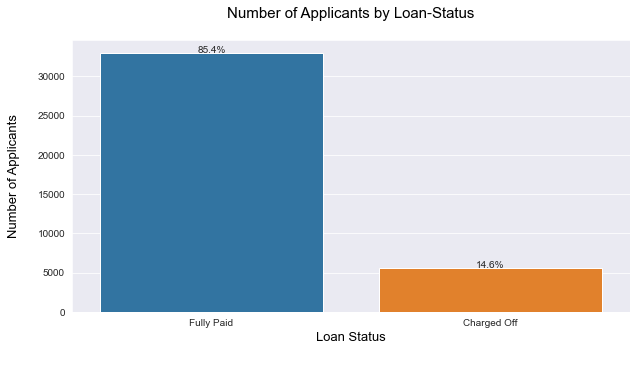

In [33]:
# Defalu rate is 14.6% which is 5627 indivisuals

plt.figure(figsize=(10,5))
ax =sns.countplot(df['loan_status'])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df))
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

plt.title('Number of Applicants by Loan-Status\n',fontdict=font_title)
plt.xlabel('Loan Status\n',fontdict=font_lable)
plt.ylabel('Number of Applicants\n',fontdict=font_lable);

In [34]:
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

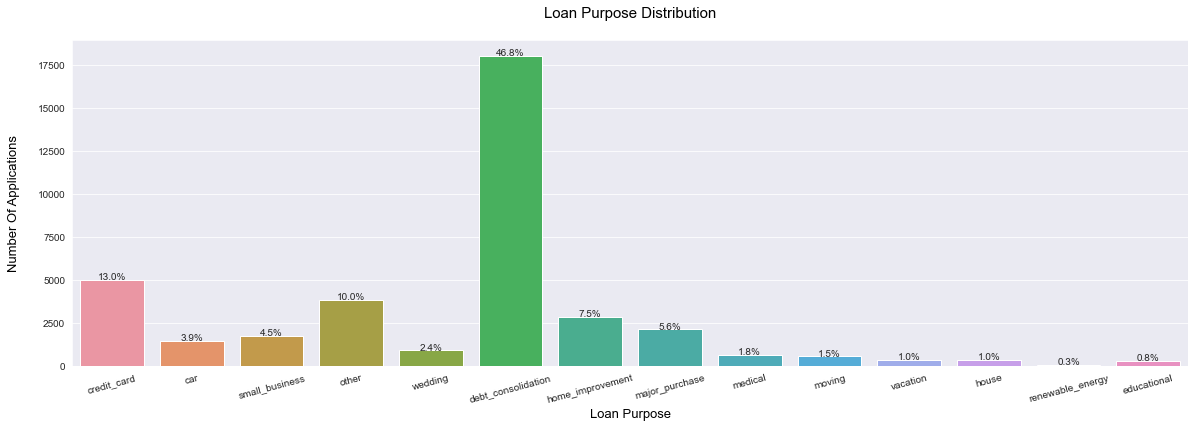

In [35]:
'''
Insites:
Out of all purpose for application max purpose is debt_consolidation, followed by credit_card and home_improvement
'''


plt.figure(figsize=(20,6))
ax = sns.countplot(df['purpose'])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df))
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

plt.title('Loan Purpose Distribution\n',fontdict=font_title)
plt.xlabel('Loan Purpose\n',fontdict=font_lable)
plt.xticks(rotation=15)
plt.ylabel('Number Of Applications\n',fontdict=font_lable);

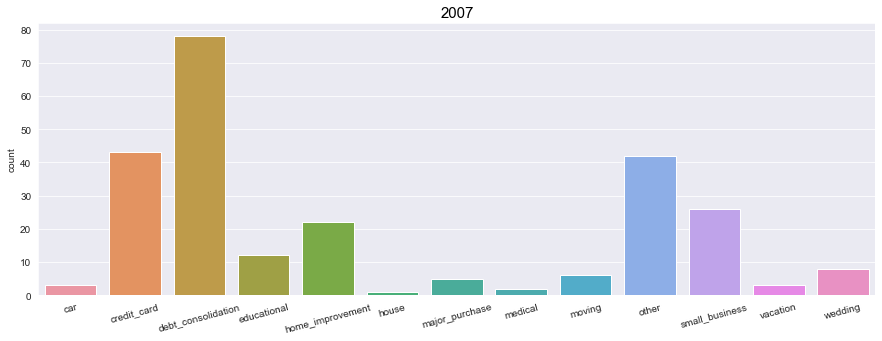

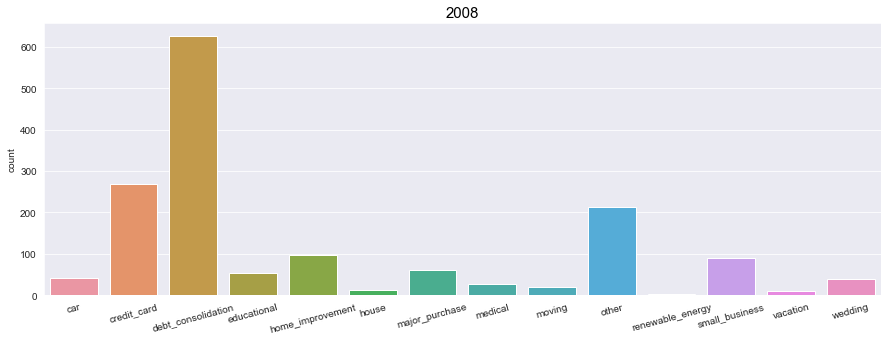

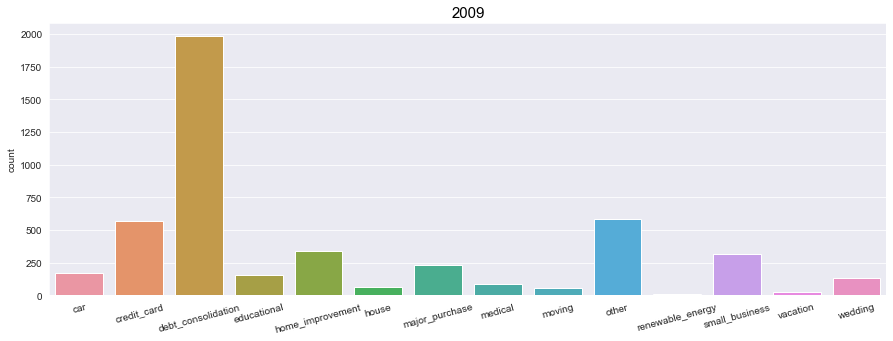

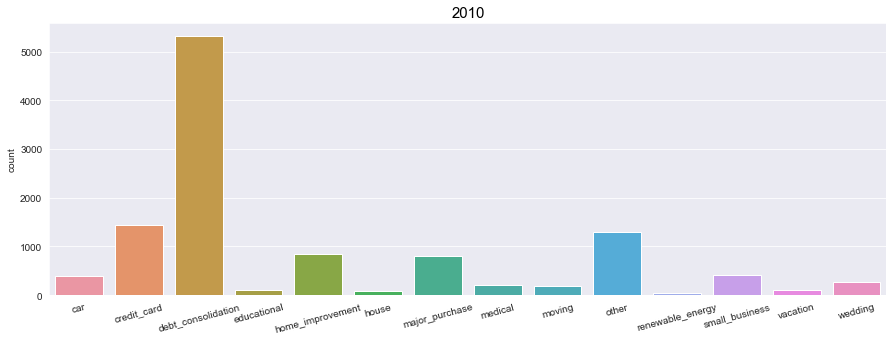

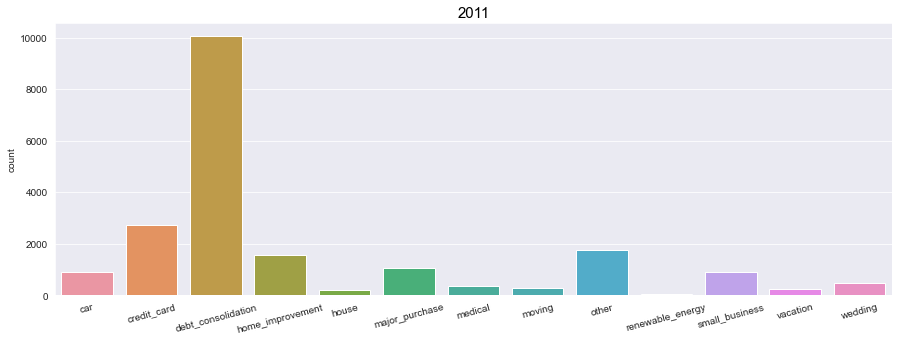

In [36]:
# Year wise distribution plot of number of application purpose wise

for y in ['2007','2008','2009','2010','2011']:
    plt.figure(figsize=(15,5))
    sns.countplot(sorted(df[df['issue_d_year']==y]['purpose']))
    plt.xticks(rotation=15)
    plt.title(y,fontdict=font_title)
    plt.show();

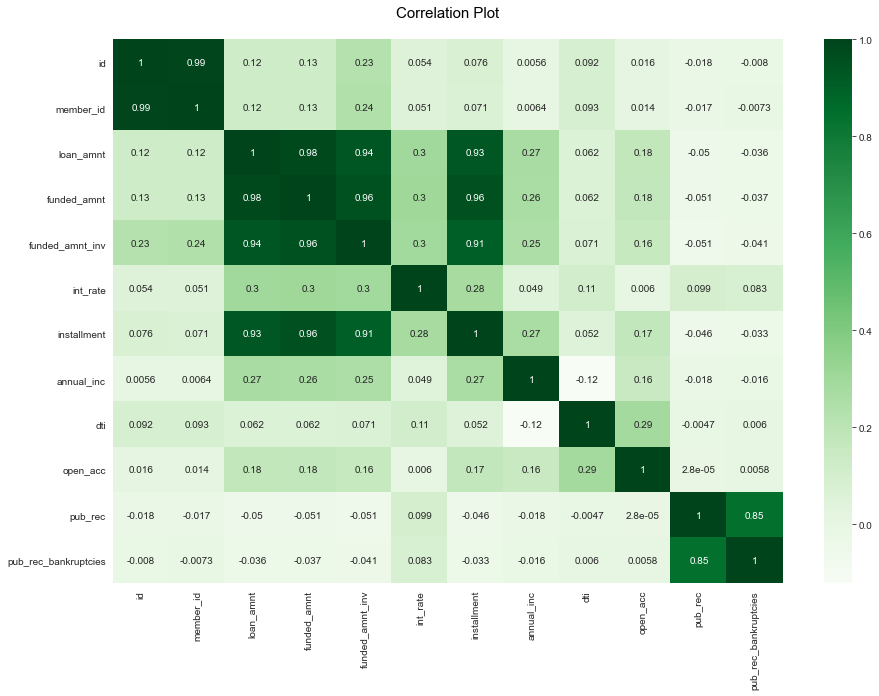

In [37]:
# Heat map to check correlation of continus variables

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap="Greens")
plt.title('Correlation Plot\n',fontdict=font_title);

### From Above

- `id` and `member-id` have high inter correlation
- `loan_amnt`, `funded_amnt`, `funded_amnt_inv` and `installment` are highly correlated
- `pub_rec` and `pub_rec_bankruptices` are also highly correlated

In [38]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,open_acc,pub_rec,pub_rec_bankruptcies,issue_d_month,issue_d_year
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,11-Dec,Fully Paid,credit_card,AZ,27.65,3,0,0.0,Dec,2011
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,11-Dec,Charged Off,car,GA,1.00,3,0,0.0,Dec,2011
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,11-Dec,Fully Paid,small_business,IL,8.72,2,0,0.0,Dec,2011
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,11-Dec,Fully Paid,other,CA,20.00,10,0,0.0,Dec,2011
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,11-Dec,Fully Paid,wedding,AZ,11.20,9,0,0.0,Dec,2011


   grade  loan_status     id  percentage
0      A  Charged Off    602         6.0
1      A   Fully Paid   9443        94.0
2      B  Charged Off   1425        12.0
3      B   Fully Paid  10250        88.0
4      C  Charged Off   1347        17.0
5      C   Fully Paid   6487        83.0
6      D  Charged Off   1118        22.0
7      D   Fully Paid   3967        78.0
8      E  Charged Off    715        27.0
9      E   Fully Paid   1948        73.0
10     F  Charged Off    319        33.0
11     F   Fully Paid    657        67.0
12     G  Charged Off    101        34.0
13     G   Fully Paid    198        66.0


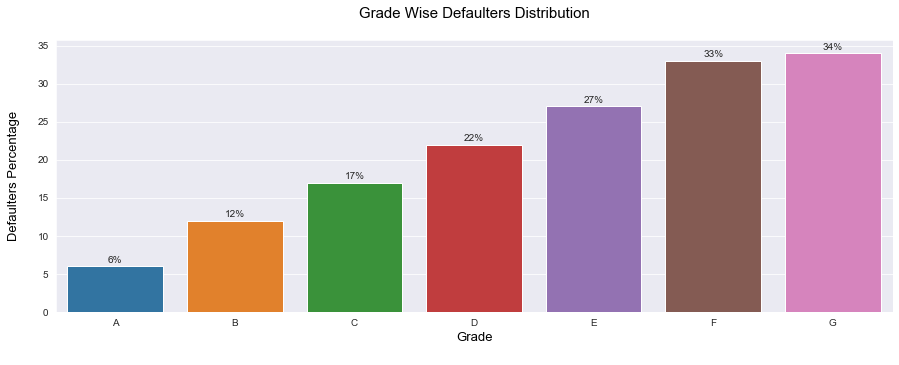

In [39]:
'''
Insites:
Percentage of defaluters from grade are the least in grade A and for F and G are the highest 
'''

temp_df = df.groupby(['grade','loan_status'])[['id']].count().reset_index()
temp_df['percentage'] = round(100 * temp_df['id'] / temp_df.groupby('grade')['id'].transform('sum'),0)
print(temp_df)

plt.figure(figsize=(15,5))
ax = sns.barplot(temp_df[temp_df['loan_status'] == 'Charged Off']['grade'],
            temp_df[temp_df['loan_status'] == 'Charged Off']['percentage'])

for p in ax.patches:
    percentage = '{:.0f}%'.format(p.get_height())
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+0.5
    ax.annotate(percentage, (x, y),ha='center')

plt.title('Grade Wise Defaulters Distribution\n',fontdict=font_title)
plt.xlabel('Grade\n',fontdict=font_lable)
plt.ylabel('Defaulters Percentage\n',fontdict=font_lable);

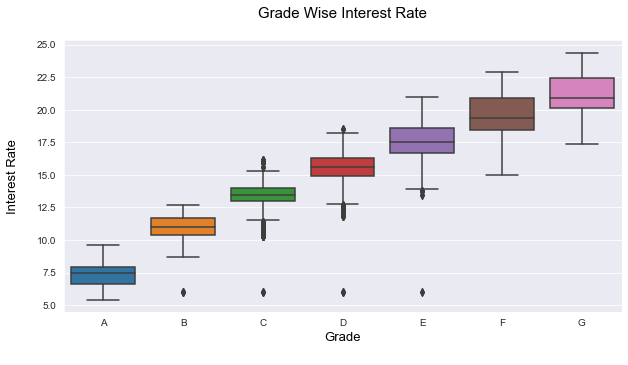

In [40]:
plt.figure(figsize=(10,5))
sns.boxplot(y = df['int_rate'],x = df['grade'], order= sorted(df['grade'].unique()))
plt.title('Grade Wise Interest Rate\n',fontdict=font_title)
plt.xlabel('Grade\n',fontdict=font_lable)
plt.ylabel('Interest Rate\n',fontdict=font_lable);

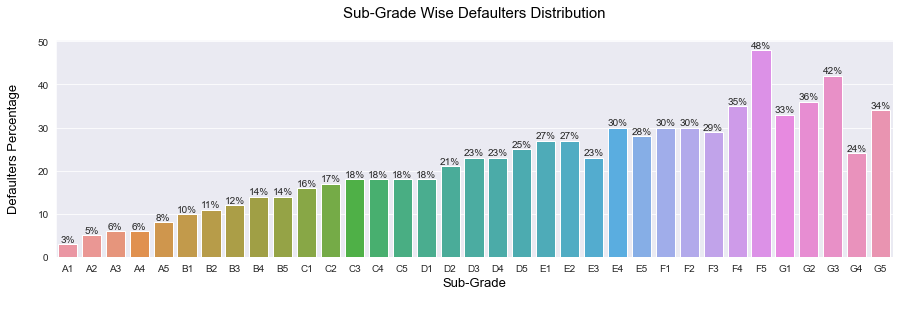

In [41]:
'''
Insites:
Percentage of defaluters from sub- grade are highest in F5 and G3 
'''

temp_df = df.groupby(['sub_grade','loan_status'])[['id']].count().reset_index()
temp_df['percentage'] = round(100 * temp_df['id'] / temp_df.groupby('sub_grade')['id'].transform('sum'),0)
# print(temp_df)

plt.figure(figsize=(15,4))
ax =sns.barplot(temp_df[temp_df['loan_status'] == 'Charged Off']['sub_grade'],
            temp_df[temp_df['loan_status'] == 'Charged Off']['percentage'])

for p in ax.patches:
    percentage = '{:.0f}%'.format(p.get_height())
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+0.5
    ax.annotate(percentage, (x, y),ha='center')

plt.title('Sub-Grade Wise Defaulters Distribution\n',fontdict=font_title)
plt.xlabel('Sub-Grade\n',fontdict=font_lable)
plt.ylabel('Defaulters Percentage\n',fontdict=font_lable);

         term  loan_status     id  percentage
0   36 months  Charged Off   3227        11.0
1   36 months   Fully Paid  25869        89.0
2   60 months  Charged Off   2400        25.0
3   60 months   Fully Paid   7081        75.0


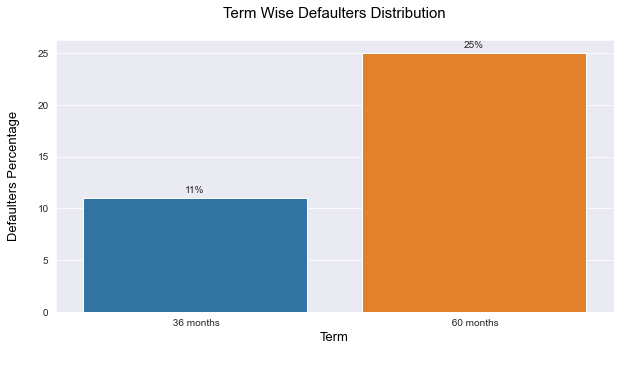

In [42]:
'''
Insites:
Percentage of defaluters from term are moe in 60 months than 36 months although the number of laon applications are more
in 36 months term. So its correct to says that indivisuals appling for 60 months term have high chance of defaulter.
'''

temp_df = df.groupby(['term','loan_status'])[['id']].count().reset_index()
temp_df['percentage'] = round(100 * temp_df['id'] / temp_df.groupby('term')['id'].transform('sum'),0)
print(temp_df)

plt.figure(figsize=(10,5))
ax = sns.barplot(temp_df[temp_df['loan_status'] == 'Charged Off']['term'],
            temp_df[temp_df['loan_status'] == 'Charged Off']['percentage'])

for p in ax.patches:
    percentage = '{:.0f}%'.format(p.get_height())
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+0.5
    ax.annotate(percentage, (x, y),ha='center')

plt.title('Term Wise Defaulters Distribution\n',fontdict=font_title)
plt.xlabel('Term\n',fontdict=font_lable)
plt.ylabel('Defaulters Percentage\n',fontdict=font_lable);

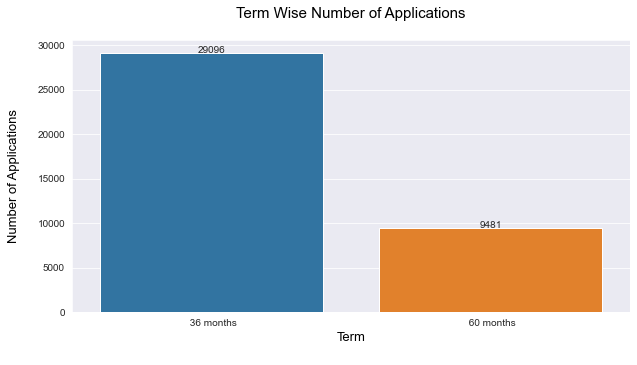

In [43]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df['term'])

for p in ax.patches:
    percentage = '{:.0f}'.format(p.get_height())
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+0.5
    ax.annotate(percentage, (x, y),ha='center')

plt.title('Term Wise Number of Applications\n',fontdict=font_title)
plt.xlabel('Term\n',fontdict=font_lable)
plt.ylabel('Number of Applications\n',fontdict=font_lable);

   emp_length  loan_status    id  percentage
0      1 year  Charged Off   456        14.0
1      1 year   Fully Paid  2713        86.0
2   10+ years  Charged Off  1331        16.0
3   10+ years   Fully Paid  7157        84.0
4     2 years  Charged Off   567        13.0
5     2 years   Fully Paid  3724        87.0
6     3 years  Charged Off   555        14.0
7     3 years   Fully Paid  3457        86.0
8     4 years  Charged Off   462        14.0
9     4 years   Fully Paid  2880        86.0
10    5 years  Charged Off   458        14.0
11    5 years   Fully Paid  2736        86.0
12    6 years  Charged Off   307        14.0
13    6 years   Fully Paid  1861        86.0
14    7 years  Charged Off   263        15.0
15    7 years   Fully Paid  1448        85.0
16    8 years  Charged Off   203        14.0
17    8 years   Fully Paid  1232        86.0
18    9 years  Charged Off   158        13.0
19    9 years   Fully Paid  1068        87.0
20   < 1 year  Charged Off   639        14.0
21   < 1 y

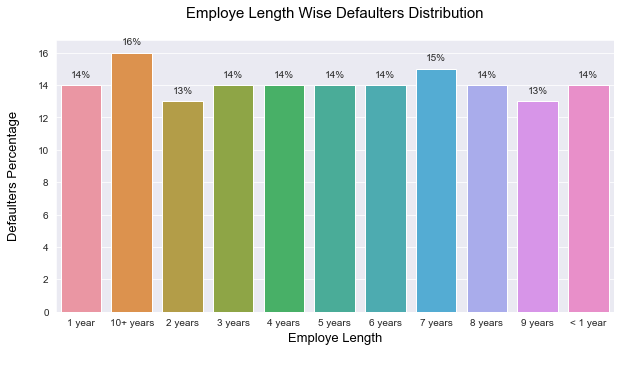

In [44]:
'''
Insites:
    The percentage of risk of Defaulters is maximum for customer experience - 10+ years & minimum for 9 year’s experience . 
    Rest year of experience is in between
'''

temp_df = df.groupby(['emp_length','loan_status'])[['id']].count().reset_index()
temp_df['percentage'] = round(100 * temp_df['id'] / temp_df.groupby('emp_length')['id'].transform('sum'),0)
print(temp_df)

plt.figure(figsize=(10,5))
ax = sns.barplot(temp_df[temp_df['loan_status'] == 'Charged Off']['emp_length'],
            temp_df[temp_df['loan_status'] == 'Charged Off']['percentage'])

for p in ax.patches:
    percentage = '{:.0f}%'.format(p.get_height())
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+0.5
    ax.annotate(percentage, (x, y),ha='center')

plt.title('Employe Length Wise Defaulters Distribution\n',fontdict=font_title)
plt.xlabel('Employe Length\n',fontdict=font_lable)
plt.ylabel('Defaulters Percentage\n',fontdict=font_lable);

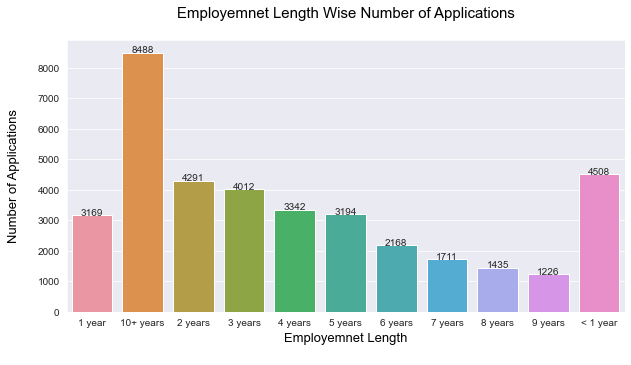

In [45]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df['emp_length'],order=temp_df['emp_length'].unique())

for p in ax.patches:
    percentage = '{:.0f}'.format(p.get_height())
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+0.5
    ax.annotate(percentage, (x, y),ha='center')

plt.title('Employemnet Length Wise Number of Applications\n',fontdict=font_title)
plt.xlabel('Employemnet Length\n',fontdict=font_lable)
plt.ylabel('Number of Applications\n',fontdict=font_lable);

  home_ownership  loan_status     id  percentage
0       MORTGAGE  Charged Off   2327        14.0
1       MORTGAGE   Fully Paid  14694        86.0
2           NONE   Fully Paid      3       100.0
3          OTHER  Charged Off     18        18.0
4          OTHER   Fully Paid     80        82.0
5            OWN  Charged Off    443        15.0
6            OWN   Fully Paid   2532        85.0
7           RENT  Charged Off   2839        15.0
8           RENT   Fully Paid  15641        85.0


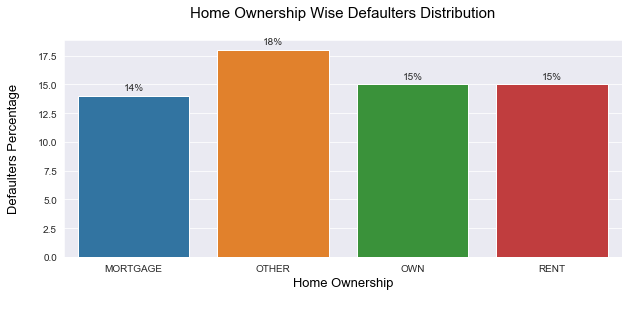

In [46]:
'''
Insites:
There is not much effect of home_ownership on finding out defaulters
'''

temp_df = df.groupby(['home_ownership','loan_status'])[['id']].count().reset_index()
temp_df['percentage'] = round(100 * temp_df['id'] / temp_df.groupby('home_ownership')['id'].transform('sum'),0)
print(temp_df)

plt.figure(figsize=(10,4))
ax = sns.barplot(temp_df[temp_df['loan_status'] == 'Charged Off']['home_ownership'],
            temp_df[temp_df['loan_status'] == 'Charged Off']['percentage'])

for p in ax.patches:
    percentage = '{:.0f}%'.format(p.get_height())
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+0.5
    ax.annotate(percentage, (x, y),ha='center')

plt.title('Home Ownership Wise Defaulters Distribution\n',fontdict=font_title)
plt.xlabel('Home Ownership\n',fontdict=font_lable)
plt.ylabel('Defaulters Percentage\n',fontdict=font_lable);

  verification_status  loan_status     id  percentage
0        Not Verified  Charged Off   2142        13.0
1        Not Verified   Fully Paid  14552        87.0
2     Source Verified  Charged Off   1434        15.0
3     Source Verified   Fully Paid   8243        85.0
4            Verified  Charged Off   2051        17.0
5            Verified   Fully Paid  10155        83.0


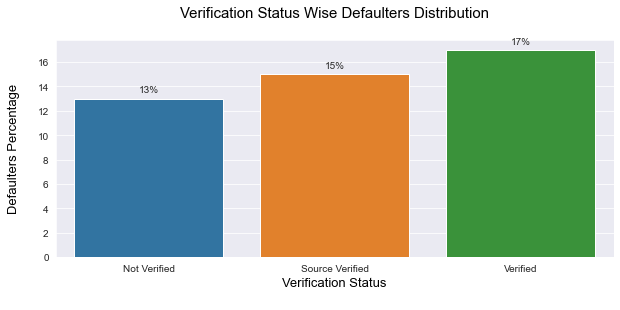

In [47]:
'''
Insites:
Verified useres are more likes to be defulter than Not-Verified. This is completely new insites than what we 
generally think. 
'''

temp_df = df.groupby(['verification_status','loan_status'])[['id']].count().reset_index()
temp_df['percentage'] = round(100 * temp_df['id'] / temp_df.groupby('verification_status')['id'].transform('sum'),0)
print(temp_df)

plt.figure(figsize=(10,4))
ax =sns.barplot(temp_df[temp_df['loan_status'] == 'Charged Off']['verification_status'],
            temp_df[temp_df['loan_status'] == 'Charged Off']['percentage'])

for p in ax.patches:
    percentage = '{:.0f}%'.format(p.get_height())
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+0.5
    ax.annotate(percentage, (x, y),ha='center')

plt.title('Verification Status Wise Defaulters Distribution\n',fontdict=font_title)
plt.xlabel('Verification Status\n',fontdict=font_lable)
plt.ylabel('Defaulters Percentage\n',fontdict=font_lable);

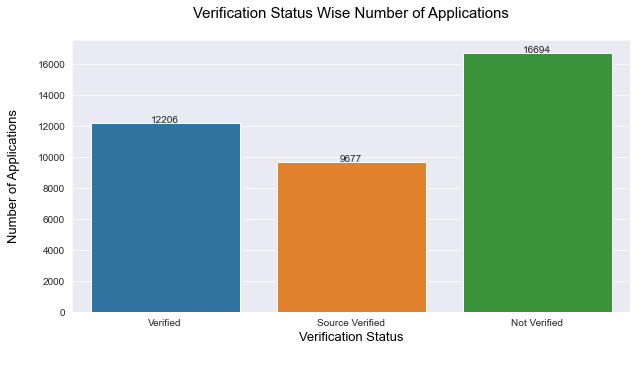

In [48]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df['verification_status'])

for p in ax.patches:
    percentage = '{:.0f}'.format(p.get_height())
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+0.5
    ax.annotate(percentage, (x, y),ha='center')

plt.title('Verification Status Wise Number of Applications\n',fontdict=font_title)
plt.xlabel('Verification Status\n',fontdict=font_lable)
plt.ylabel('Number of Applications\n',fontdict=font_lable);

In [49]:
temp_df[temp_df['loan_status'] == 'Charged Off']['percentage'].sort_values()

0    13.0
2    15.0
4    17.0
Name: percentage, dtype: float64

               purpose  loan_status     id  percentage
0                  car  Charged Off    160        11.0
1                  car   Fully Paid   1339        89.0
2          credit_card  Charged Off    542        11.0
3          credit_card   Fully Paid   4485        89.0
4   debt_consolidation  Charged Off   2767        15.0
5   debt_consolidation   Fully Paid  15288        85.0
6          educational  Charged Off     56        17.0
7          educational   Fully Paid    269        83.0
8     home_improvement  Charged Off    347        12.0
9     home_improvement   Fully Paid   2528        88.0
10               house  Charged Off     59        16.0
11               house   Fully Paid    308        84.0
12      major_purchase  Charged Off    222        10.0
13      major_purchase   Fully Paid   1928        90.0
14             medical  Charged Off    106        16.0
15             medical   Fully Paid    575        84.0
16              moving  Charged Off     92        16.0
17        

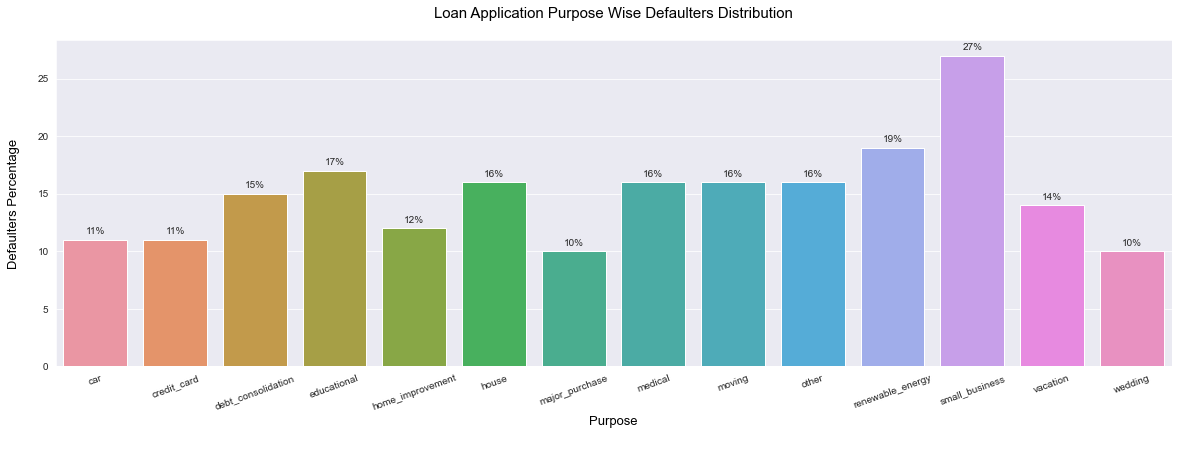

In [50]:
'''
Insites:
out of all purpose 'small_buisness' are more likely to be defulters them 'renewable_energy' and 'educational'
'''

temp_df = df.groupby(['purpose','loan_status'])[['id']].count().reset_index()
temp_df['percentage'] = round(100 * temp_df['id'] / temp_df.groupby('purpose')['id'].transform('sum'),0)
print(temp_df)

plt.figure(figsize=(20,6))
ax = sns.barplot(temp_df[temp_df['loan_status'] == 'Charged Off']['purpose'],
            temp_df[temp_df['loan_status'] == 'Charged Off']['percentage'])
plt.xticks(rotation=20)

for p in ax.patches:
    percentage = '{:.0f}%'.format(p.get_height())
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+0.5
    ax.annotate(percentage, (x, y),ha='center')

plt.title('Loan Application Purpose Wise Defaulters Distribution\n',fontdict=font_title)
plt.xlabel('Purpose\n',fontdict=font_lable)
plt.ylabel('Defaulters Percentage\n',fontdict=font_lable);

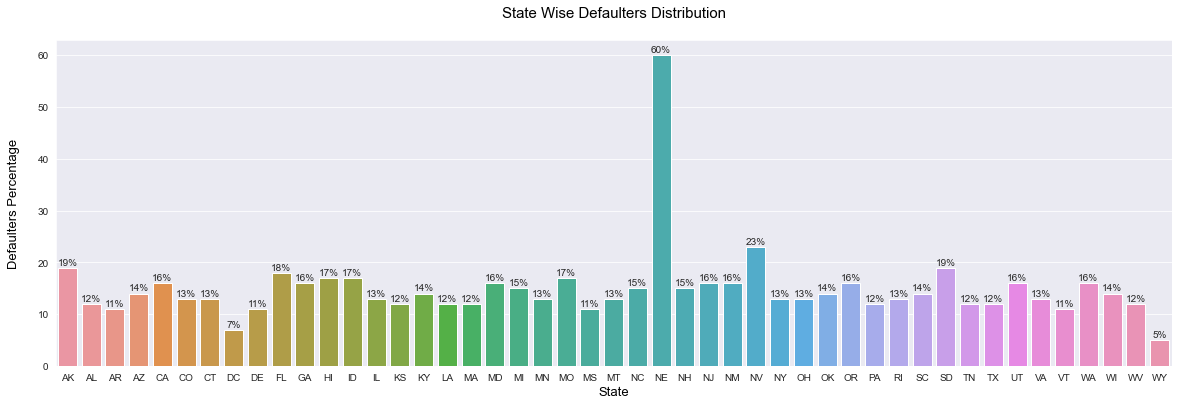

In [51]:
'''
Insites:
Out of all states 'NE' i.e Nebraska has very high percentage of defaulters
'''

temp_df = df.groupby(['addr_state','loan_status'])[['id']].count().reset_index()
temp_df['percentage'] = round(100 * temp_df['id'] / temp_df.groupby('addr_state')['id'].transform('sum'),0)
# print(temp_df)

plt.figure(figsize=(20,6))
ax =sns.barplot(temp_df[temp_df['loan_status'] == 'Charged Off']['addr_state'],
            temp_df[temp_df['loan_status'] == 'Charged Off']['percentage'])

for p in ax.patches:
    percentage = '{:.0f}%'.format(p.get_height())
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+0.5
    ax.annotate(percentage, (x, y),ha='center')

plt.title('State Wise Defaulters Distribution\n',fontdict=font_title)
plt.xlabel('State\n',fontdict=font_lable)
plt.ylabel('Defaulters Percentage\n',fontdict=font_lable);

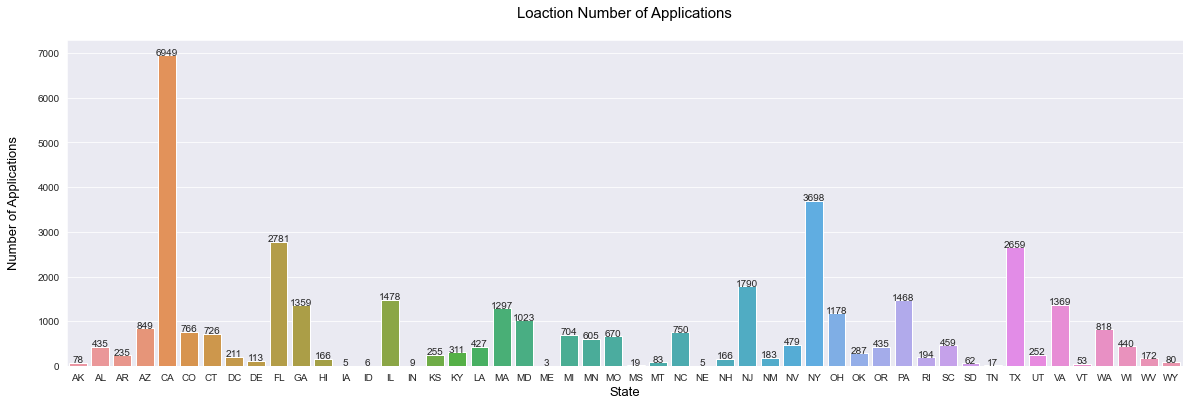

In [52]:
plt.figure(figsize=(20,6))
ax = sns.countplot(sorted(df['addr_state']))

for p in ax.patches:
    percentage = '{:.0f}'.format(p.get_height())
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+0.5
    ax.annotate(percentage, (x, y),ha='center')

plt.title('Loaction Number of Applications\n',fontdict=font_title)
plt.xlabel('State\n',fontdict=font_lable)
plt.ylabel('Number of Applications\n',fontdict=font_lable);

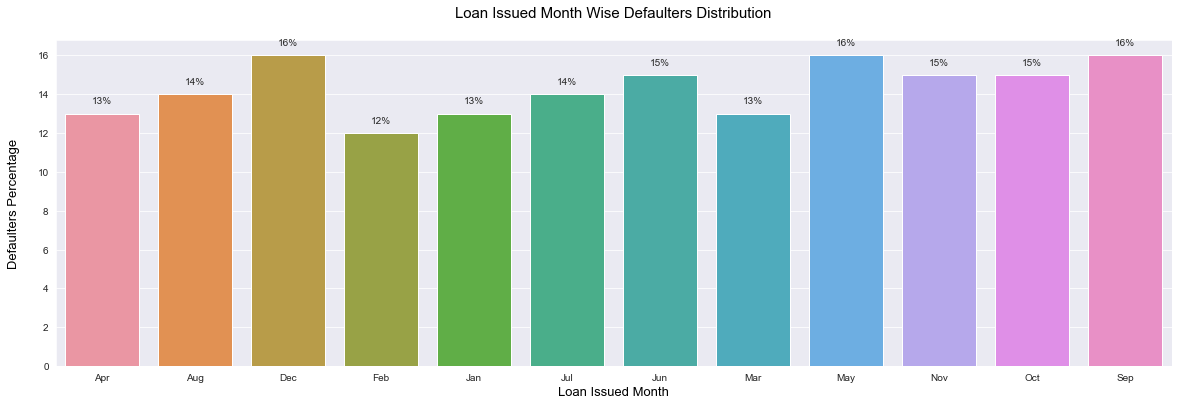

In [53]:
'''
Insites:
basis on approval month not much trend in dafaulter percentage.
'''

temp_df = df.groupby(['issue_d_month','loan_status'])[['id']].count().reset_index()
temp_df['percentage'] = round(100 * temp_df['id'] / temp_df.groupby('issue_d_month')['id'].transform('sum'),0)
# print(temp_df)

plt.figure(figsize=(20,6))
ax = sns.barplot(temp_df[temp_df['loan_status'] == 'Charged Off']['issue_d_month'],
            temp_df[temp_df['loan_status'] == 'Charged Off']['percentage'])

for p in ax.patches:
    percentage = '{:.0f}%'.format(p.get_height())
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+0.5
    ax.annotate(percentage, (x, y),ha='center')

plt.title('Loan Issued Month Wise Defaulters Distribution\n',fontdict=font_title)
plt.xlabel('Loan Issued Month\n',fontdict=font_lable)
plt.ylabel('Defaulters Percentage\n',fontdict=font_lable);

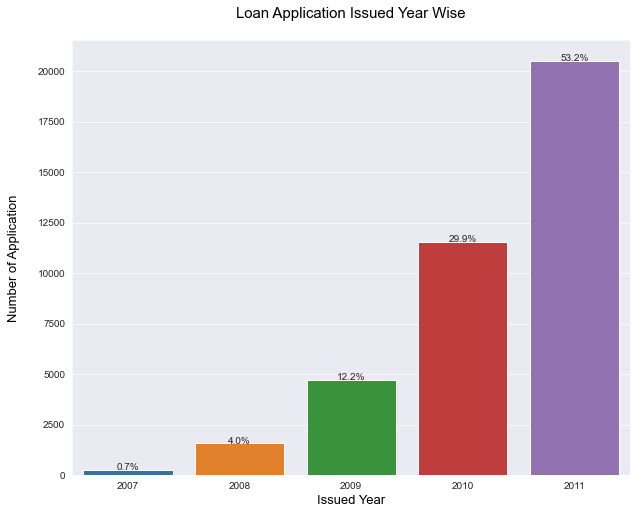

In [54]:
'''
Insites:
As the year is passing total number of application for the load is also increasing
'''

plt.figure(figsize=(10,8))
ax = sns.countplot(sorted(df['issue_d_year']))

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df))
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

plt.title('Loan Application Issued Year Wise\n',fontdict=font_title)
plt.xlabel('Issued Year\n',fontdict=font_lable)
plt.ylabel('Number of Application\n',fontdict=font_lable);

In [55]:
df['pub_rec_bankruptcies'].value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

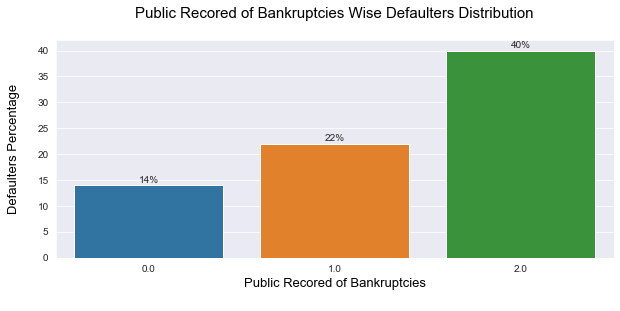

In [56]:
'''
Insites:
Higher the pub_rec_bankruptcies higer the chnage that indivisual is the defaulter
'''

temp_df = df.groupby(['pub_rec_bankruptcies','loan_status'])[['id']].count().reset_index()
temp_df['percentage'] = round(100 * temp_df['id'] / temp_df.groupby('pub_rec_bankruptcies')['id'].transform('sum'),0)
# print(temp_df)

plt.figure(figsize=(10,4))
ax = sns.barplot(temp_df[temp_df['loan_status'] == 'Charged Off']['pub_rec_bankruptcies'],
            temp_df[temp_df['loan_status'] == 'Charged Off']['percentage'])

for p in ax.patches:
    percentage = '{:.0f}%'.format(p.get_height())
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+0.5
    ax.annotate(percentage, (x, y),ha='center')

plt.title('Public Recored of Bankruptcies Wise Defaulters Distribution\n',fontdict=font_title)
plt.xlabel('Public Recored of Bankruptcies\n',fontdict=font_lable)
plt.ylabel('Defaulters Percentage\n',fontdict=font_lable);

In [57]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,open_acc,pub_rec,pub_rec_bankruptcies,issue_d_month,issue_d_year
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,11-Dec,Fully Paid,credit_card,AZ,27.65,3,0,0.0,Dec,2011
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,11-Dec,Charged Off,car,GA,1.00,3,0,0.0,Dec,2011
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,11-Dec,Fully Paid,small_business,IL,8.72,2,0,0.0,Dec,2011
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,11-Dec,Fully Paid,other,CA,20.00,10,0,0.0,Dec,2011
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,11-Dec,Fully Paid,wedding,AZ,11.20,9,0,0.0,Dec,2011


***Till now we compare all categorical variables with Target variables i.e. `loan_status`<br>
Now lets compare continuous variables with `loan_status`, but to compare continuous variables with categorical we need to convert them to categorical variables first and best way to do that is binning***

In [58]:
print(f'Min Value: {df["loan_amnt"].min()}\nMax Value: {df["loan_amnt"].max()}')

bins = np.linspace(df['loan_amnt'].min(),df['loan_amnt'].max(),5)
labels = ['low', 'medium', 'high', 'very-high']

df['loan_amnt_bins'] = pd.cut(df['loan_amnt'], bins=bins, labels=labels, include_lowest=True)

Min Value: 500
Max Value: 35000


In [59]:
print(f'Min Value: {df["funded_amnt"].min()}\nMax Value: {df["funded_amnt"].max()}')

bins = np.linspace(df['funded_amnt'].min(),df['funded_amnt'].max(),5)
labels = ['low', 'medium', 'high', 'very-high']

df['funded_amnt_bins'] = pd.cut(df['funded_amnt'], bins=bins, labels=labels, include_lowest=True)

Min Value: 500
Max Value: 35000


In [60]:
print(f'Min Value: {df["funded_amnt_inv"].min()}\nMax Value: {df["funded_amnt_inv"].max()}')

bins = np.linspace(df['funded_amnt_inv'].min(),df['funded_amnt_inv'].max(),5)
labels = ['low', 'medium', 'high', 'very-high']

df['funded_amnt_inv_bins'] = pd.cut(df['funded_amnt_inv'], bins=bins, labels=labels, include_lowest=True)

Min Value: 0.0
Max Value: 35000.0


In [61]:
print(f'Min Value: {df["int_rate"].min()}\nMax Value: {df["int_rate"].max()}')

bins = np.linspace(df['int_rate'].min(),df['int_rate'].max(),5)
labels = ['low', 'medium', 'high', 'very-high']

df['int_rate_bins'] = pd.cut(df['int_rate'], bins=bins, labels=labels, include_lowest=True)

Min Value: 5.42
Max Value: 24.4


In [62]:
print(f'Min Value: {df["installment"].min()}\nMax Value: {df["installment"].max()}')

bins = np.linspace(df['installment'].min(),df['installment'].max(),5)
labels = ['low', 'medium', 'high', 'very-high']

df['installment_bins'] = pd.cut(df['installment'], bins=bins, labels=labels, include_lowest=True)

Min Value: 15.69
Max Value: 1305.19


In [63]:
print(f'Min Value: {df["annual_inc"].min()}\nMax Value: {df["annual_inc"].max()}')

bins = [4000,50000,100000,150000,6000000]
labels = ['low', 'medium', 'high', 'very-high']

df['annual_inc_bins'] = pd.cut(df['annual_inc'], bins=bins, labels=labels, include_lowest=True)

Min Value: 4000.0
Max Value: 6000000.0


In [64]:
print(f'Min Value: {df["dti"].min()}\nMax Value: {df["dti"].max()}')

bins = np.linspace(df['dti'].min(),df['dti'].max(),5)
labels = ['low', 'medium', 'high', 'very-high']

df['dti_bins'] = pd.cut(df['dti'], bins=bins, labels=labels, include_lowest=True)

Min Value: 0.0
Max Value: 29.99


In [65]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,open_acc,pub_rec,pub_rec_bankruptcies,issue_d_month,issue_d_year,loan_amnt_bins,funded_amnt_bins,funded_amnt_inv_bins,int_rate_bins,installment_bins,annual_inc_bins,dti_bins
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,11-Dec,Fully Paid,credit_card,AZ,27.65,3,0,0.0,Dec,2011,low,low,low,medium,low,low,very-high
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,11-Dec,Charged Off,car,GA,1.00,3,0,0.0,Dec,2011,low,low,low,high,low,low,low
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,11-Dec,Fully Paid,small_business,IL,8.72,2,0,0.0,Dec,2011,low,low,low,high,low,low,medium
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,11-Dec,Fully Paid,other,CA,20.00,10,0,0.0,Dec,2011,medium,medium,medium,medium,medium,low,high
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,11-Dec,Fully Paid,wedding,AZ,11.20,9,0,0.0,Dec,2011,low,low,low,low,low,low,medium


***Once we converted all continuous columns to categorical lets plot same bar graph as we for categorical variable WRT defaulter***

Text(0, 0.5, 'Density\n')

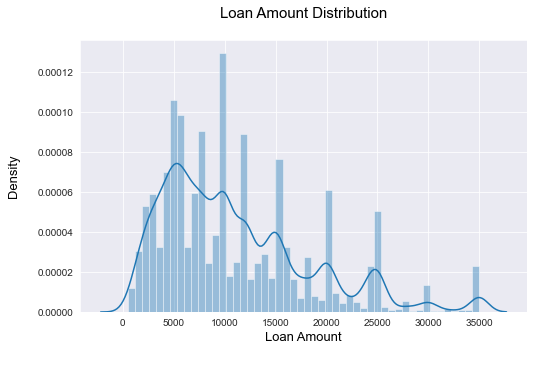

In [66]:
'''
Insites:
Funded amount is left skewed. Most of the loan amount given is below 10 lakhs. Probability of people with loan amount 
greater than 10 lakhs tends to default is more than the people with less than 10 lakh
'''
plt.figure(figsize=(8, 5))
sns.distplot(df['loan_amnt'])
plt.title('Loan Amount Distribution\n', fontdict=font_title)
plt.xlabel('Loan Amount\n', fontdict=font_lable)
plt.ylabel('Density\n', fontdict=font_lable)

  loan_amnt_bins  loan_status     id  percentage
0            low  Charged Off   2473        13.0
1            low   Fully Paid  16170        87.0
2         medium  Charged Off   1848        14.0
3         medium   Fully Paid  11170        86.0
4           high  Charged Off   1011        18.0
5           high   Fully Paid   4557        82.0
6      very-high  Charged Off    295        22.0
7      very-high   Fully Paid   1053        78.0


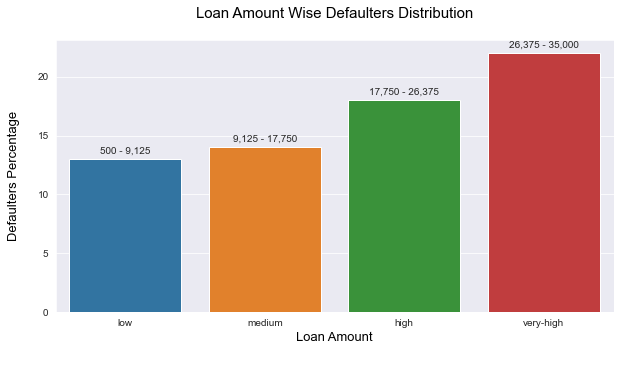

In [67]:
'''
Insites:
Higher the loan amount higher the percentage of defaulters
'''

temp_df = df.groupby(['loan_amnt_bins','loan_status'])[['id']].count().reset_index()
temp_df['percentage'] = round(100 * temp_df['id'] / temp_df.groupby('loan_amnt_bins')['id'].transform('sum'),0)
print(temp_df)

plt.figure(figsize=(10,5))
ax = sns.barplot(temp_df[temp_df['loan_status'] == 'Charged Off']['loan_amnt_bins'],
            temp_df[temp_df['loan_status'] == 'Charged Off']['percentage'])

c=0
for p in ax.patches:
    bins = ['500 - 9,125','9,125 - 17,750','17,750 - 26,375','26,375 - 35,000'][c]
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+0.5
    ax.annotate(bins, (x, y),ha='center')
    c=c+1

plt.title('Loan Amount Wise Defaulters Distribution\n',fontdict=font_title)
plt.xlabel('Loan Amount\n',fontdict=font_lable)
plt.ylabel('Defaulters Percentage\n',fontdict=font_lable);

  funded_amnt_bins  loan_status     id  percentage
0              low  Charged Off   2513        13.0
1              low   Fully Paid  16421        87.0
2           medium  Charged Off   1921        14.0
3           medium   Fully Paid  11427        86.0
4             high  Charged Off    946        18.0
5             high   Fully Paid   4170        82.0
6        very-high  Charged Off    247        21.0
7        very-high   Fully Paid    932        79.0


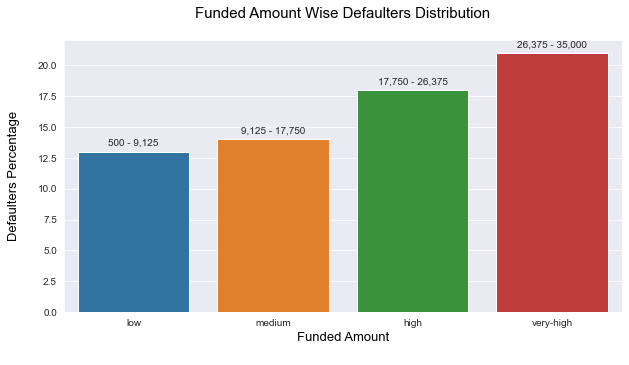

In [68]:
'''
Insites:
Higher the funded_amnt higher the percentage of defaulters
'''

temp_df = df.groupby(['funded_amnt_bins','loan_status'])[['id']].count().reset_index()
temp_df['percentage'] = round(100 * temp_df['id'] / temp_df.groupby('funded_amnt_bins')['id'].transform('sum'),0)
print(temp_df)

plt.figure(figsize=(10,5))
ax =sns.barplot(temp_df[temp_df['loan_status'] == 'Charged Off']['funded_amnt_bins'],
            temp_df[temp_df['loan_status'] == 'Charged Off']['percentage'])

c=0
for p in ax.patches:
    bins = ['500 - 9,125','9,125 - 17,750','17,750 - 26,375','26,375 - 35,000'][c]
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+0.5
    ax.annotate(bins, (x, y),ha='center')
    c=c+1

plt.title('Funded Amount Wise Defaulters Distribution\n',fontdict=font_title)
plt.xlabel('Funded Amount\n',fontdict=font_lable)
plt.ylabel('Defaulters Percentage\n',fontdict=font_lable);

  funded_amnt_inv_bins  loan_status     id  percentage
0                  low  Charged Off   2687        14.0
1                  low   Fully Paid  16640        86.0
2               medium  Charged Off   1888        14.0
3               medium   Fully Paid  11595        86.0
4                 high  Charged Off    828        18.0
5                 high   Fully Paid   3824        82.0
6            very-high  Charged Off    224        20.0
7            very-high   Fully Paid    891        80.0


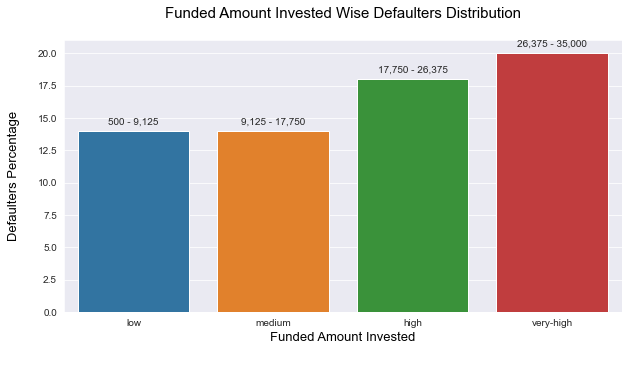

In [69]:
'''
Insites:
Higher the funded_amnt_inv higher the percentage of defaulters
'''

temp_df = df.groupby(['funded_amnt_inv_bins','loan_status'])[['id']].count().reset_index()
temp_df['percentage'] = round(100 * temp_df['id'] / temp_df.groupby('funded_amnt_inv_bins')['id'].transform('sum'),0)
print(temp_df)

plt.figure(figsize=(10,5))
ax =sns.barplot(temp_df[temp_df['loan_status'] == 'Charged Off']['funded_amnt_inv_bins'],
            temp_df[temp_df['loan_status'] == 'Charged Off']['percentage'])

c=0
for p in ax.patches:
    bins = ['500 - 9,125','9,125 - 17,750','17,750 - 26,375','26,375 - 35,000'][c]
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+0.5
    ax.annotate(bins, (x, y),ha='center')
    c=c+1

plt.title('Funded Amount Invested Wise Defaulters Distribution\n',fontdict=font_title)
plt.xlabel('Funded Amount Invested\n',fontdict=font_lable)
plt.ylabel('Defaulters Percentage\n',fontdict=font_lable);

  int_rate_bins  loan_status     id  percentage
0           low  Charged Off    839         7.0
1           low   Fully Paid  11542        93.0
2        medium  Charged Off   2629        15.0
3        medium   Fully Paid  15180        85.0
4          high  Charged Off   1784        24.0
5          high   Fully Paid   5613        76.0
6     very-high  Charged Off    375        38.0
7     very-high   Fully Paid    615        62.0


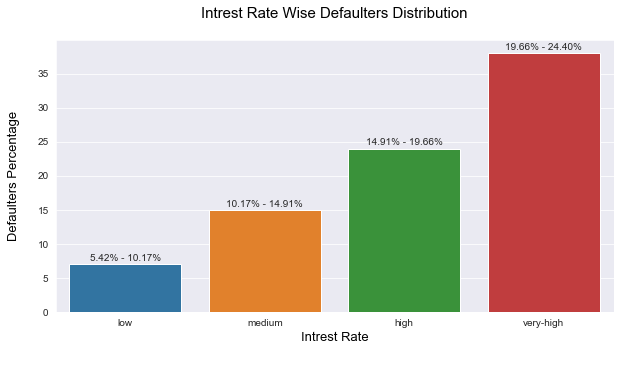

In [70]:
'''
Insites:
Higher the int_rate higher the percentage of defaulters
'''

temp_df = df.groupby(['int_rate_bins','loan_status'])[['id']].count().reset_index()
temp_df['percentage'] = round(100 * temp_df['id'] / temp_df.groupby('int_rate_bins')['id'].transform('sum'),0)
print(temp_df)

plt.figure(figsize=(10,5))
ax = sns.barplot(temp_df[temp_df['loan_status'] == 'Charged Off']['int_rate_bins'],
            temp_df[temp_df['loan_status'] == 'Charged Off']['percentage'])


c=0
for p in ax.patches:
    bins = ['5.42% - 10.17%','10.17% - 14.91%','14.91% - 19.66%','19.66% - 24.40%'][c]
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+0.5
    ax.annotate(bins, (x, y),ha='center')
    c=c+1

plt.title('Intrest Rate Wise Defaulters Distribution\n',fontdict=font_title)
plt.xlabel('Intrest Rate\n',fontdict=font_lable)
plt.ylabel('Defaulters Percentage\n',fontdict=font_lable);

  installment_bins  loan_status     id  percentage
0              low  Charged Off   3281        14.0
1              low   Fully Paid  20679        86.0
2           medium  Charged Off   1818        16.0
3           medium   Fully Paid   9648        84.0
4             high  Charged Off    500        17.0
5             high   Fully Paid   2396        83.0
6        very-high  Charged Off     28        11.0
7        very-high   Fully Paid    227        89.0


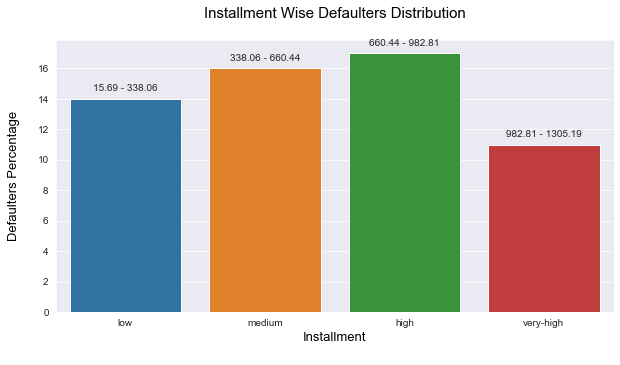

In [71]:
'''
Insites:
Higher the installment higher the percentage of defaulters
'''

temp_df = df.groupby(['installment_bins','loan_status'])[['id']].count().reset_index()
temp_df['percentage'] = round(100 * temp_df['id'] / temp_df.groupby('installment_bins')['id'].transform('sum'),0)
print(temp_df)

plt.figure(figsize=(10,5))
ax = sns.barplot(temp_df[temp_df['loan_status'] == 'Charged Off']['installment_bins'],
            temp_df[temp_df['loan_status'] == 'Charged Off']['percentage'])

c=0
for p in ax.patches:
    bins = ['15.69 - 338.06','338.06 - 660.44','660.44 - 982.81','982.81 - 1305.19'][c]
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+0.5
    ax.annotate(bins, (x, y),ha='center')
    c=c+1

plt.title('Installment Wise Defaulters Distribution\n',fontdict=font_title)
plt.xlabel('Installment\n',fontdict=font_lable)
plt.ylabel('Defaulters Percentage\n',fontdict=font_lable);

  annual_inc_bins  loan_status     id  percentage
0             low  Charged Off   2613        17.0
1             low   Fully Paid  12776        83.0
2          medium  Charged Off   2422        14.0
3          medium   Fully Paid  15285        86.0
4            high  Charged Off    429        11.0
5            high   Fully Paid   3566        89.0
6       very-high  Charged Off    163        11.0
7       very-high   Fully Paid   1323        89.0


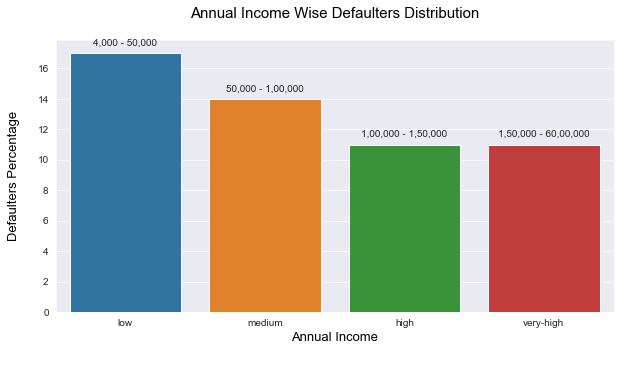

In [72]:
'''
Insites:
Lower annual_inc higher the percentage of defaulters
'''

temp_df = df.groupby(['annual_inc_bins','loan_status'])[['id']].count().reset_index()
temp_df['percentage'] = round(100 * temp_df['id'] / temp_df.groupby('annual_inc_bins')['id'].transform('sum'),0)
print(temp_df)

plt.figure(figsize=(10,5))
ax = sns.barplot(temp_df[temp_df['loan_status'] == 'Charged Off']['annual_inc_bins'],
            temp_df[temp_df['loan_status'] == 'Charged Off']['percentage'])

c=0
for p in ax.patches:
    bins = ['4,000 - 50,000','50,000 - 1,00,000','1,00,000 - 1,50,000','1,50,000 - 60,00,000'][c]
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+0.5
    ax.annotate(bins, (x, y),ha='center')
    c=c+1

plt.title('Annual Income Wise Defaulters Distribution\n',fontdict=font_title)
plt.xlabel('Annual Income\n',fontdict=font_lable)
plt.ylabel('Defaulters Percentage\n',fontdict=font_lable);

    dti_bins  loan_status     id  percentage
0        low  Charged Off   1051        12.0
1        low   Fully Paid   7533        88.0
2     medium  Charged Off   1974        14.0
3     medium   Fully Paid  11971        86.0
4       high  Charged Off   2015        16.0
5       high   Fully Paid  10468        84.0
6  very-high  Charged Off    587        16.0
7  very-high   Fully Paid   2978        84.0


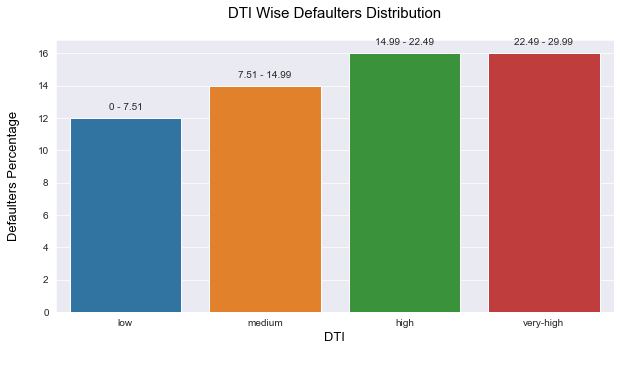

In [73]:
'''
Insites:
Higher the dti higher the percentage of defaulters
'''

temp_df = df.groupby(['dti_bins','loan_status'])[['id']].count().reset_index()
temp_df['percentage'] = round(100 * temp_df['id'] / temp_df.groupby('dti_bins')['id'].transform('sum'),0)
print(temp_df)

plt.figure(figsize=(10,5))
ax = sns.barplot(temp_df[temp_df['loan_status'] == 'Charged Off']['dti_bins'],
            temp_df[temp_df['loan_status'] == 'Charged Off']['percentage'])

c=0
for p in ax.patches:
    bins = ['0 - 7.51','7.51 - 14.99','14.99 - 22.49','22.49 - 29.99'][c]
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+0.5
    ax.annotate(bins, (x, y),ha='center')
    c=c+1

plt.title('DTI Wise Defaulters Distribution\n',fontdict=font_title)
plt.xlabel('DTI\n',fontdict=font_lable)
plt.ylabel('Defaulters Percentage\n',fontdict=font_lable);

In [74]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,open_acc,pub_rec,pub_rec_bankruptcies,issue_d_month,issue_d_year,loan_amnt_bins,funded_amnt_bins,funded_amnt_inv_bins,int_rate_bins,installment_bins,annual_inc_bins,dti_bins
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,11-Dec,Fully Paid,credit_card,AZ,27.65,3,0,0.0,Dec,2011,low,low,low,medium,low,low,very-high
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,11-Dec,Charged Off,car,GA,1.00,3,0,0.0,Dec,2011,low,low,low,high,low,low,low
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,11-Dec,Fully Paid,small_business,IL,8.72,2,0,0.0,Dec,2011,low,low,low,high,low,low,medium
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,11-Dec,Fully Paid,other,CA,20.00,10,0,0.0,Dec,2011,medium,medium,medium,medium,medium,low,high
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,11-Dec,Fully Paid,wedding,AZ,11.20,9,0,0.0,Dec,2011,low,low,low,low,low,low,medium


In [75]:
# Derived  matrix

df['debt_amount'] = df['dti']*df['annual_inc']

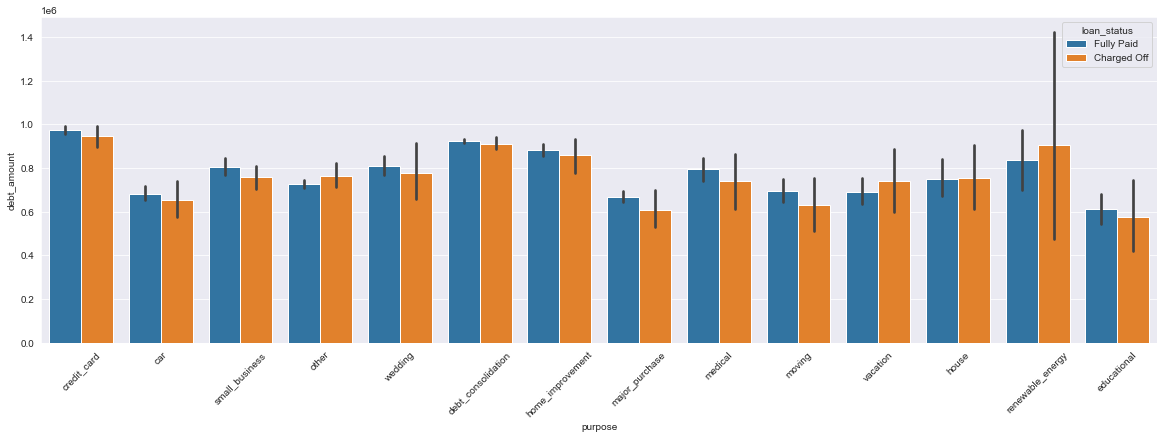

In [76]:
plt.figure(figsize=(20, 6))
sns.barplot(x='purpose',y='debt_amount',hue='loan_status',data=df)
plt.xticks(rotation=45);

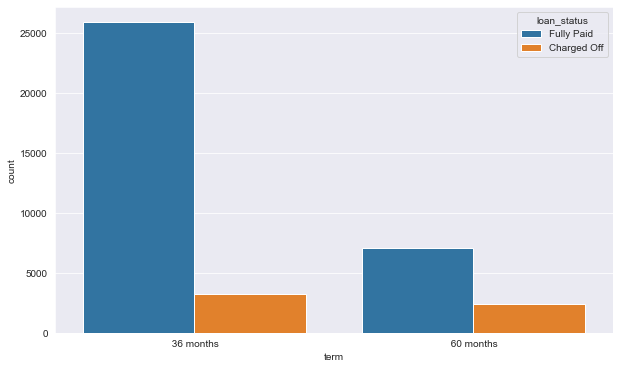

In [77]:
plt.figure(figsize=(10, 6))
sns.countplot(x='term', hue="loan_status", data=df)
plt.show()

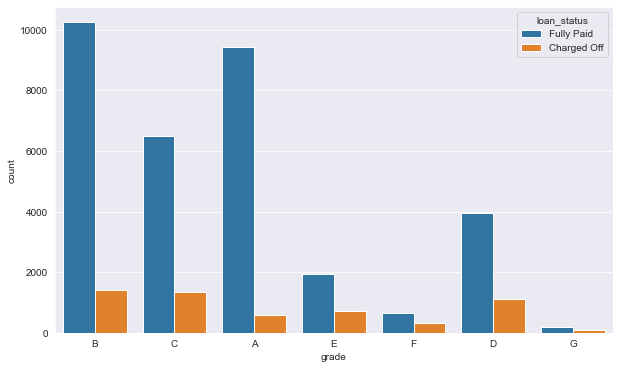

In [78]:
plt.figure(figsize=(10, 6))
sns.countplot(x='grade', hue="loan_status", data=df)
plt.show()

In [79]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,open_acc,pub_rec,pub_rec_bankruptcies,issue_d_month,issue_d_year,loan_amnt_bins,funded_amnt_bins,funded_amnt_inv_bins,int_rate_bins,installment_bins,annual_inc_bins,dti_bins,debt_amount
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,11-Dec,Fully Paid,credit_card,AZ,27.65,3,0,0.0,Dec,2011,low,low,low,medium,low,low,very-high,663600.00
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,11-Dec,Charged Off,car,GA,1.00,3,0,0.0,Dec,2011,low,low,low,high,low,low,low,30000.00
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,11-Dec,Fully Paid,small_business,IL,8.72,2,0,0.0,Dec,2011,low,low,low,high,low,low,medium,106837.44
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,11-Dec,Fully Paid,other,CA,20.00,10,0,0.0,Dec,2011,medium,medium,medium,medium,medium,low,high,984000.00
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,11-Dec,Fully Paid,wedding,AZ,11.20,9,0,0.0,Dec,2011,low,low,low,low,low,low,medium,403200.00


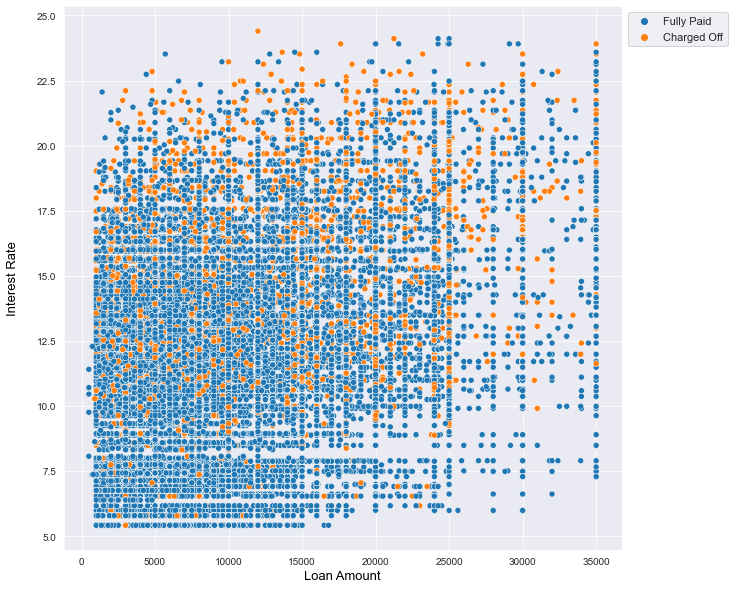

In [80]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df['loan_amnt'],y=df['int_rate'],hue=df['loan_status'])
plt.xlabel('Loan Amount\n',fontdict=font_lable)
plt.ylabel('Interest Rate\n',fontdict=font_lable)
plt.legend(bbox_to_anchor=(1.2,1),fontsize=11);

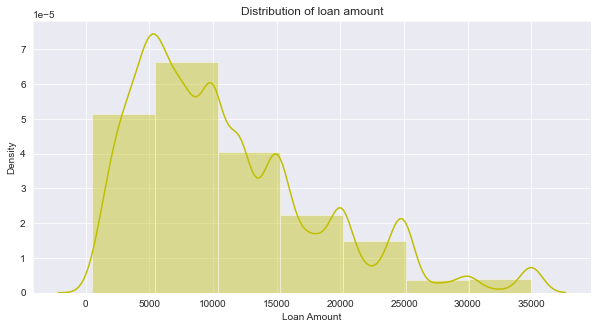

In [81]:
'''
Insites: 
    The distribution of loan amount i.e the amount of loan applied can be visualized from the below plot . 
    It has been observed that the maximum loan range amount is between 5000-10000 i.e maximum applicant got loam amount 
    in that range.
'''

#loan amount distribution 
plt.figure(figsize=(10,5))
ax=sns.distplot(df['loan_amnt'],bins=7,color='y')
ax.set(xlabel='Loan Amount',title='Distribution of loan amount');

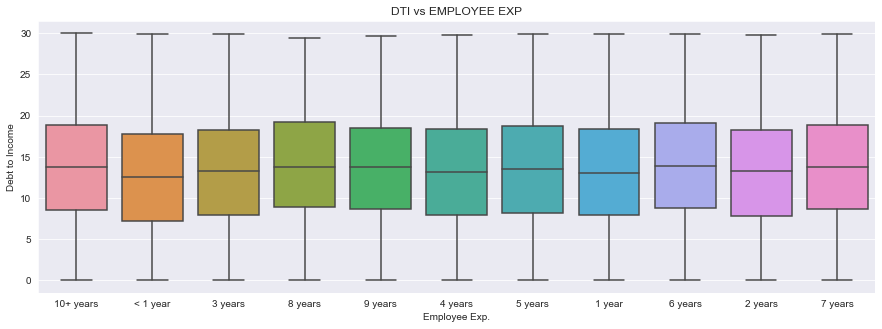

In [82]:
'''
Insites: 
    By doing bivariate analysis it has been observed that 10+ years and 8 yaers of employee exp. Is having debt to income in maximum 
    range apart from that rest year of employee exp. are more or less in same range.
'''
plt.figure(figsize=(15,5))
ax=sns.boxplot(x='emp_length',y='dti',data=df)
ax.set(xlabel='Employee Exp.', ylabel='Debt to Income',title='DTI vs EMPLOYEE EXP');

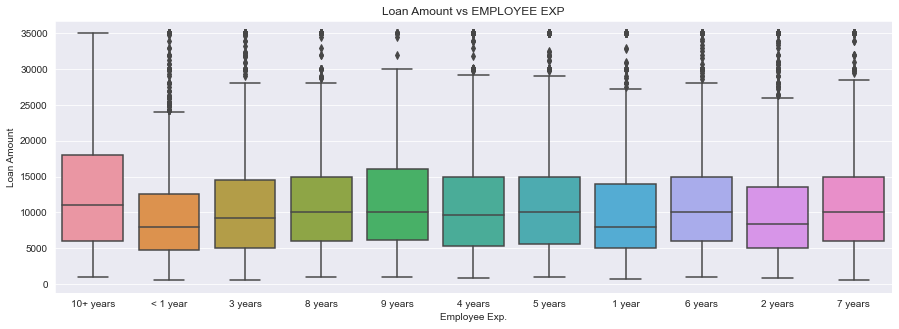

In [83]:
'''
Insites: 
By doing bivariate analysis it has been observed that the employee exp. With 10+ years is taking more amount of loan 
and those who are less than 1 year is taken less amount of loan.
'''

plt.figure(figsize=(15,5))
ax=sns.boxplot(x='emp_length',y='loan_amnt',data=df)
ax.set(xlabel='Employee Exp.', ylabel='Loan Amount',title='Loan Amount vs EMPLOYEE EXP');

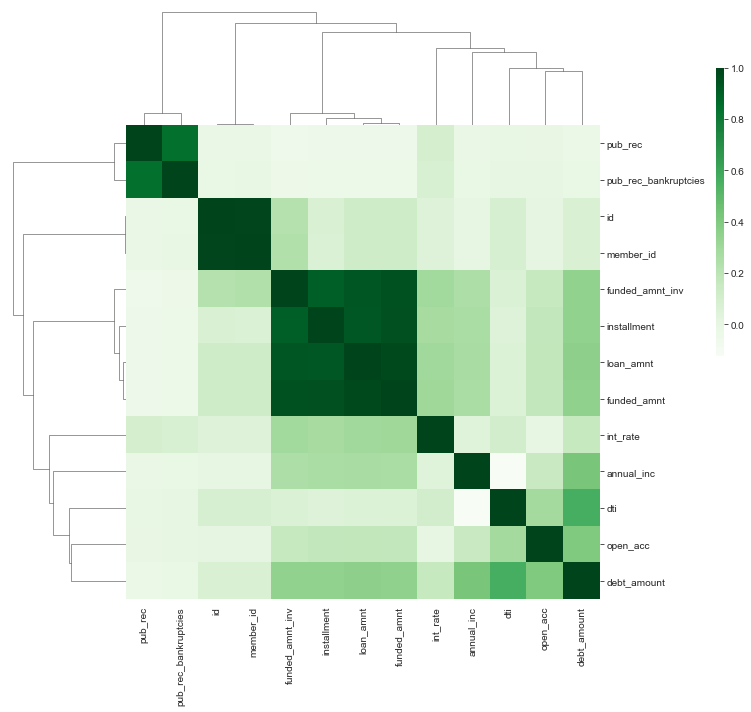

In [84]:
'''
Insites:
pub_rec_bankruptcies and pub_rec are highly correlated
annual_inc and loan amount are correlated. They are together correlated with interest rate
'''

sns.clustermap(df.corr(method ='pearson'), cmap="Greens",figsize=(10,10),cbar_pos = (1,0.5,0.01,0.4));

# Recommendation

- Grades and Sub-Grade are one of the good metrics for finding loan defaulters. Lending club has to look into the information from borrowers before issuing loans to low grade like grade F & G and specifically Sub Grades like F5,G5 and G3.
- Lending club should reduce the high interest rate for 60 months tenure, there are more chances for loan to get default from long term tenure.
- Lending Club before approving loan should take a look at the DTI (Debt to Income ratio) of the applicants. As DTI of borrowers increases their tendency of defaults also increases. Specially for application whose DTI is greater than 14.99 are more likely to be defaulter.
- Lending club should be more conscious when approving loans for applicants in the lower annual income segment, borrowers having annual income in range of 4k-50k has more of defaults.
- When the loan amount higher the chance of applicants is defaulters is also higher. Lending club should properly analyze the applicants demanding higher loan.
- Lending club should be more cautious when approving loan for the purpose of Small business, Debt consolidation ,Credit card and Education.
- Loans having higher interest rate i.e. above 19% have more numbers of defaulters. Lending Club  should check the background of applicant thoroughly if interest rate is high.
- Lending Club should take extra security while approving applicants belonging to NE, NV, SD and AK state, as tendency to default is high.
- If applicant employment length is >10 years Lending Club should thoroughly check applicants background as there are many defaulters in >10 years as an employment length.
- Applicants with a background bankruptcy should thoroughly check of current financial situation.